<a href="https://colab.research.google.com/github/Oyeniran20/Machine-Learning/blob/main/MNIST_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# check shape
X_train.shape

(60000, 28, 28)

In [16]:
y_train[2]

4

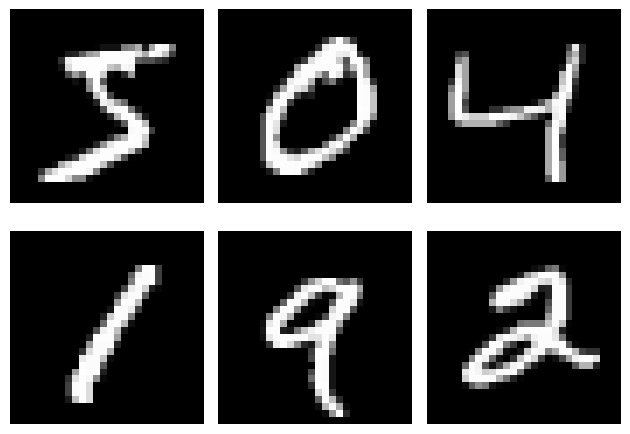

In [20]:
# Display image and label
import matplotlib.pyplot as plt
import numpy as np

for i in range (6):
  plt.subplot(2, 3, i+1)
  plt.imshow(X_train[i], cmap='gray')
  plt.axis('off')

plt.tight_layout()
plt.show()

Data Preprocessing

In [23]:
X_train.min(), X_train.max()

(0.0, 1.0)

In [21]:
# Normalize pixel values
X_train = X_train/255
X_test = X_test/255



Build the ANN Model

In [27]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'), # First Layer
    Dense(64, activation='relu'), # Second Layer
    Dense(10, activation='softmax') # Output Layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# Compile the model
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

Train the model

In [32]:
# fit the model
history = model.fit(
    X_train, y_train,
    validation_split = 0.2,
    epochs = 50
)

Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8616 - loss: 0.4664 - val_accuracy: 0.9613 - val_loss: 0.1402
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9657 - loss: 0.1144 - val_accuracy: 0.9670 - val_loss: 0.1043
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9764 - loss: 0.0764 - val_accuracy: 0.9711 - val_loss: 0.0972
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9829 - loss: 0.0540 - val_accuracy: 0.9743 - val_loss: 0.0945
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0405 - val_accuracy: 0.9688 - val_loss: 0.1058
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9900 - loss: 0.0321 - val_accuracy: 0.9732 - val_loss: 0.1029
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9903 - loss: 0.0290 - val_accuracy: 0.9730 - val_loss: 0.1074
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9924 - loss: 0.0225 

Evaluate the Model

In [34]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
test_accuracy, test_loss

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9723 - loss: 0.2646


(0.9757999777793884, 0.22311772406101227)

Visualize the model

In [35]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

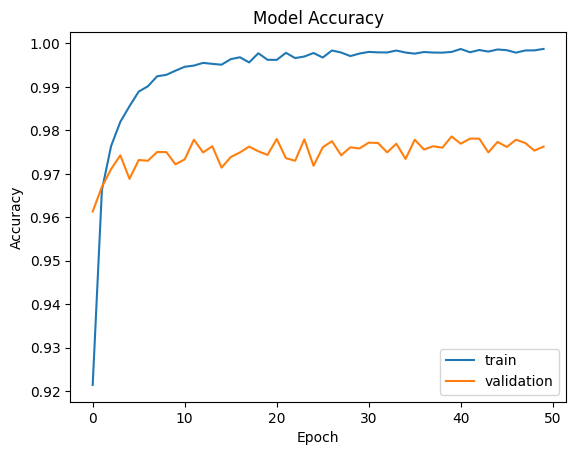

In [37]:
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'validation'])
plt.show()

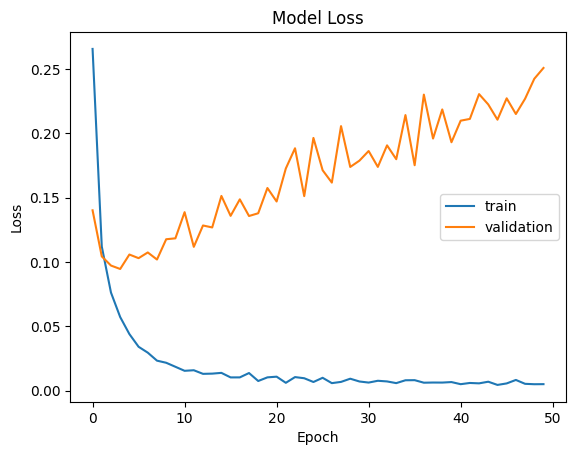

In [38]:
# plot the accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'validation'])
plt.show()

Make Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
9848


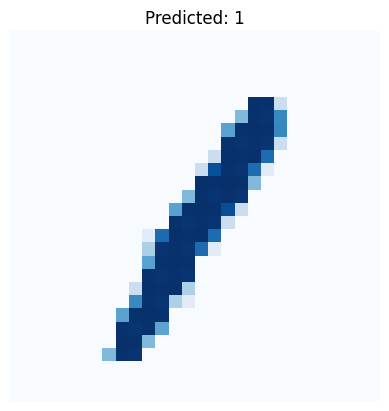

In [47]:
# predict on test data

pred = model.predict(X_test)

# Display a test image with its predicted label
random_row = np.random.randint(0, X_test.shape[0])
plt.imshow(X_test[random_row], cmap='Blues')
plt.title(f'Predicted: {np.argmax(pred[random_row])}')
plt.axis('off')
print(random_row)
plt.show()

In [48]:
y_test[random_row]

1